In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:\\Users\\bhara\\Downloads\\BankChurners.csv")

# Check the shape and basic info
print(data.shape)
print(data.info())
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

(10127, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                               

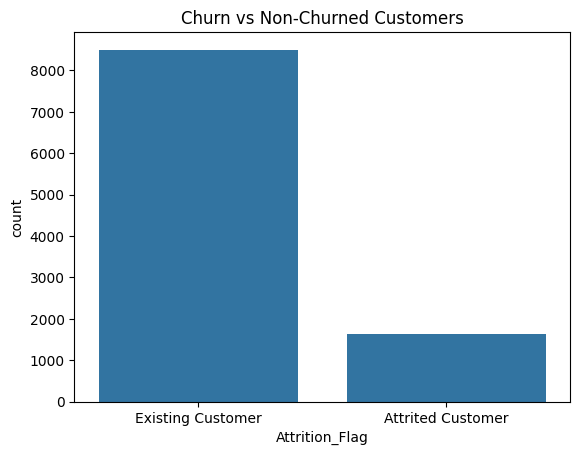

Attrition_Flag
Existing Customer    83.934038
Attrited Customer    16.065962
Name: proportion, dtype: float64


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the distribution of churned customers
sns.countplot(x='Attrition_Flag', data=data)
plt.title('Churn vs Non-Churned Customers')
plt.show()

# Check the percentage of churned customers
churn_rate = data['Attrition_Flag'].value_counts(normalize=True) * 100
print(churn_rate)

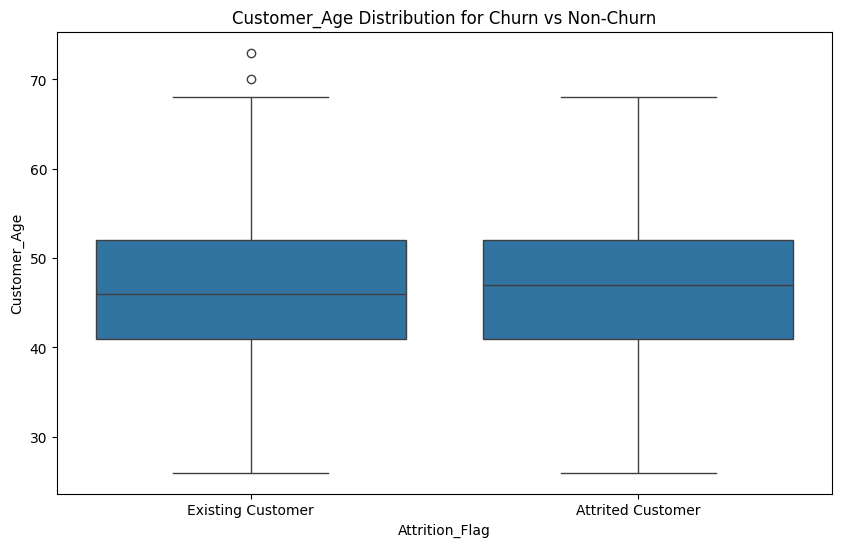

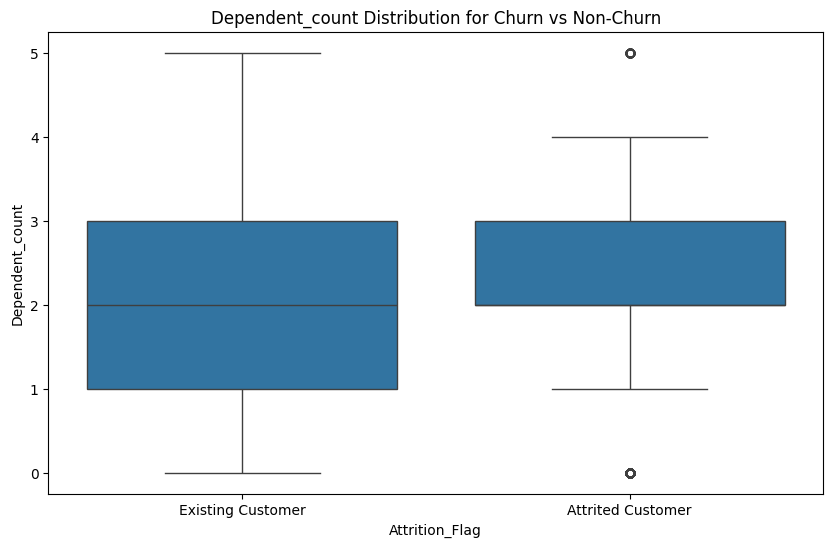

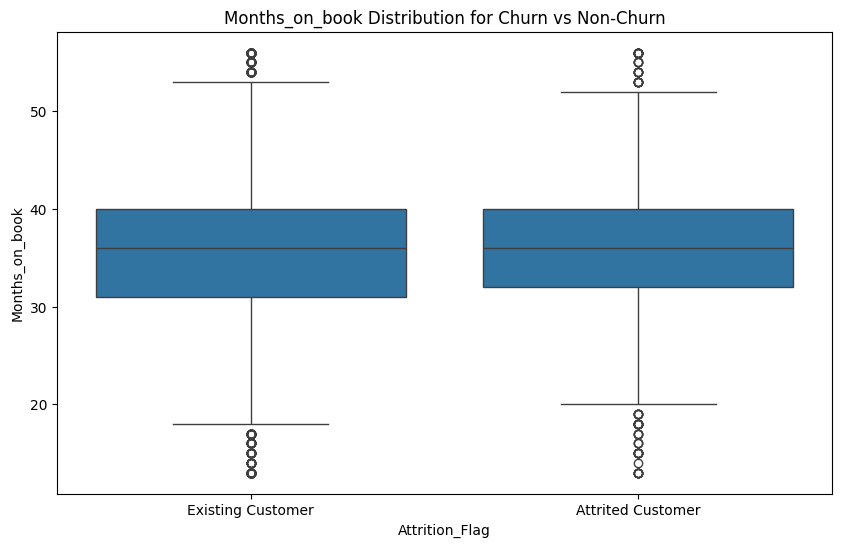

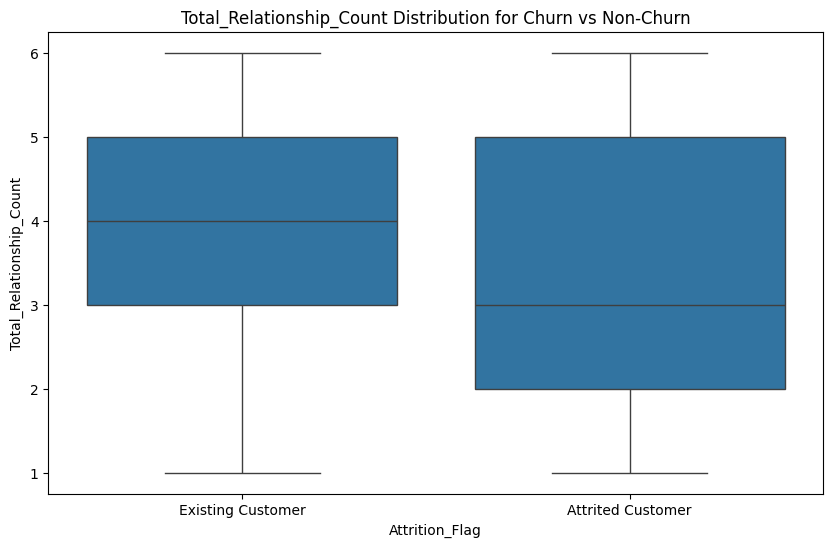

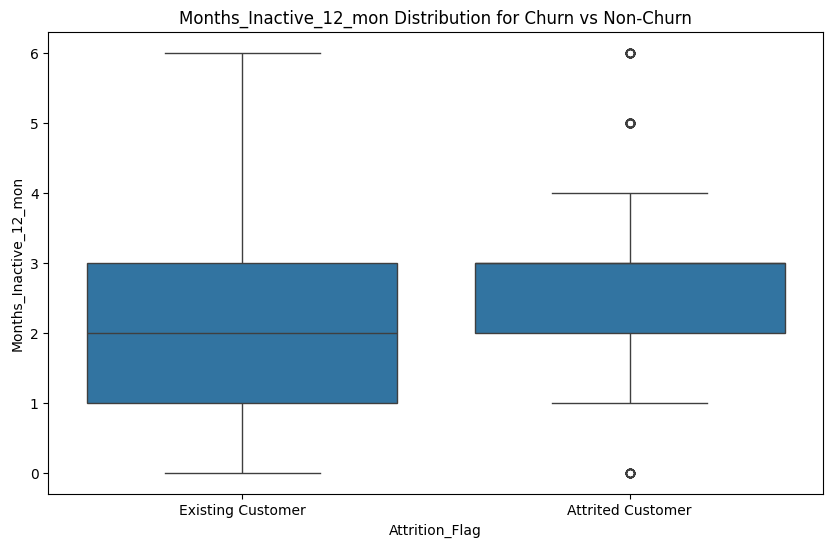

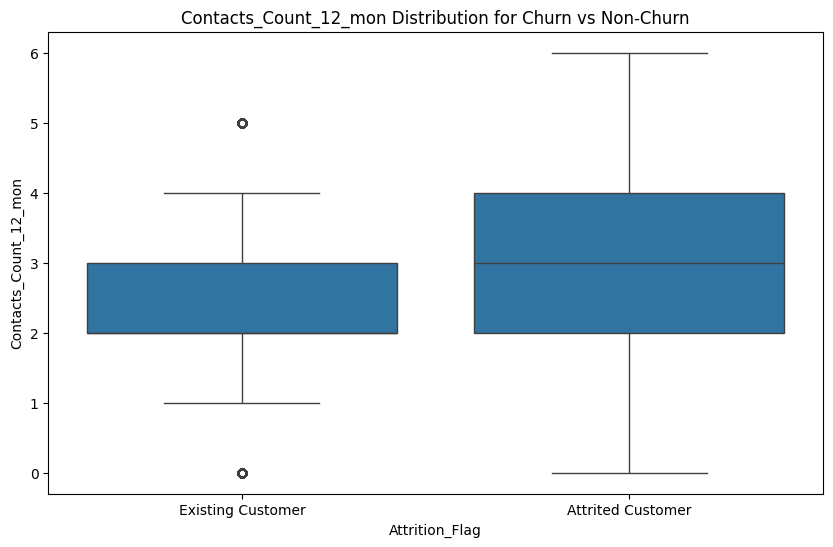

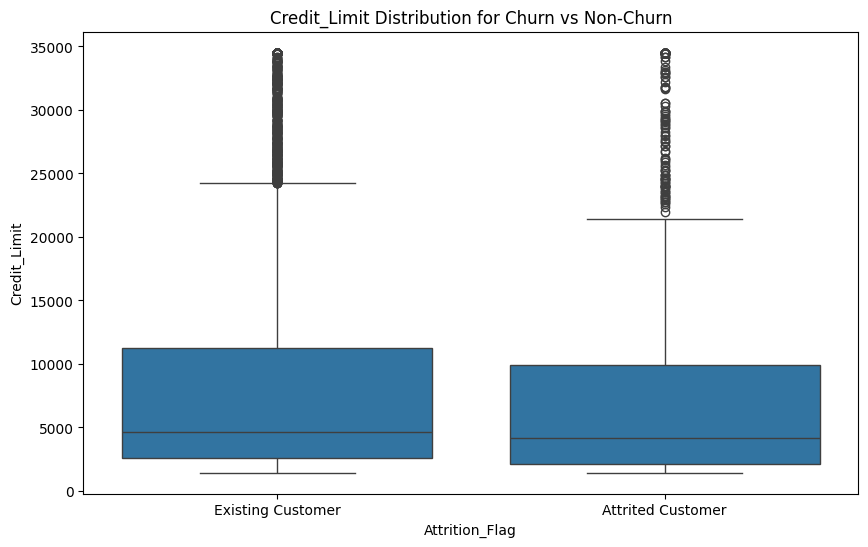

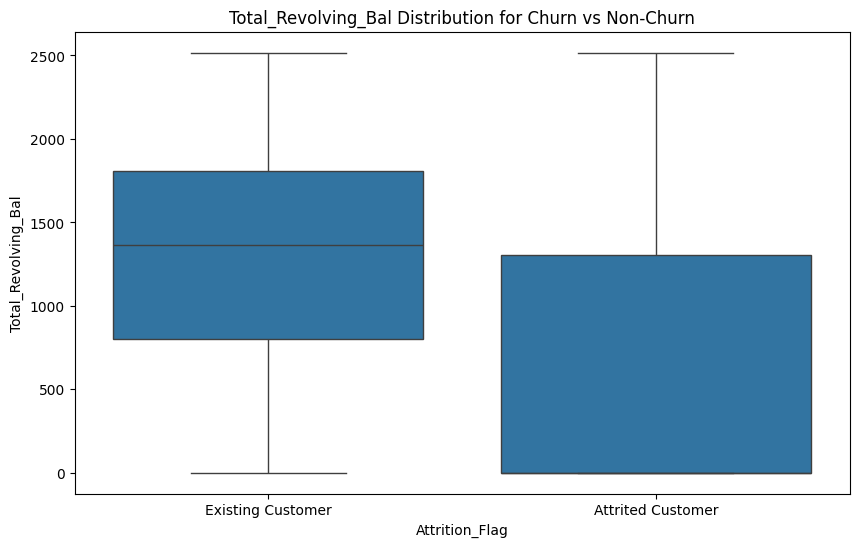

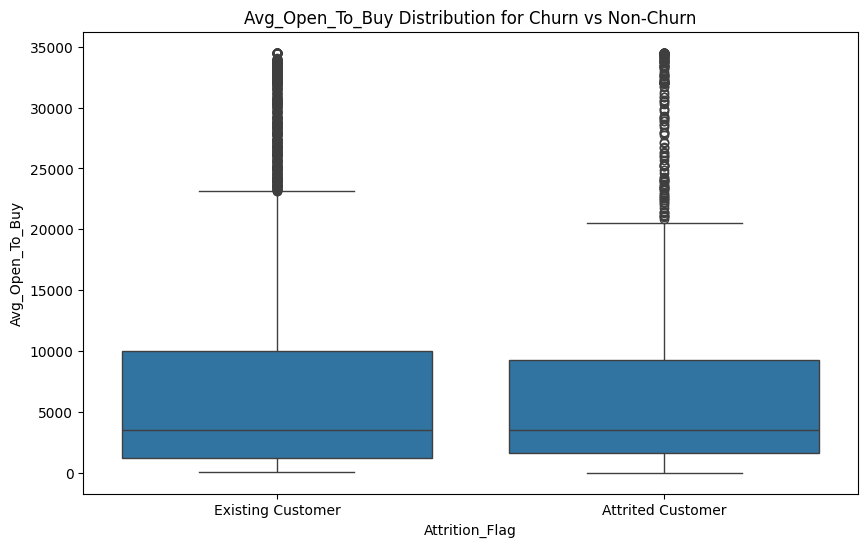

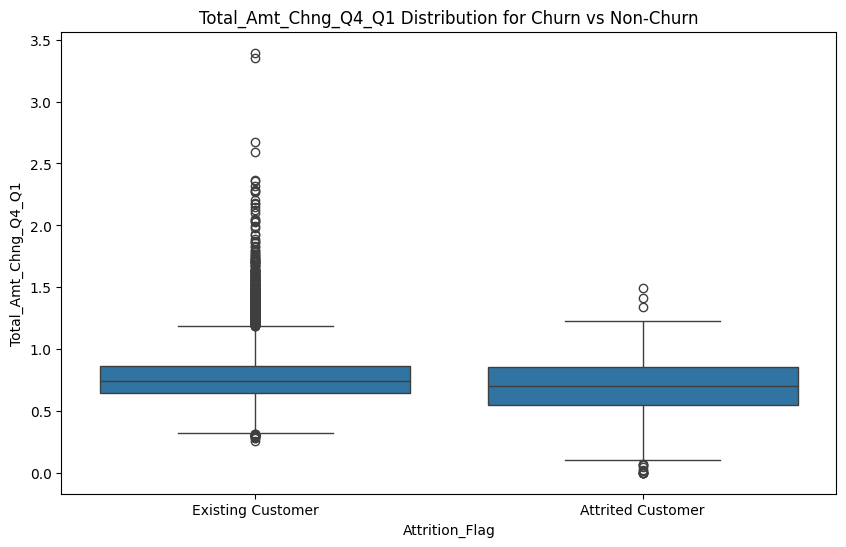

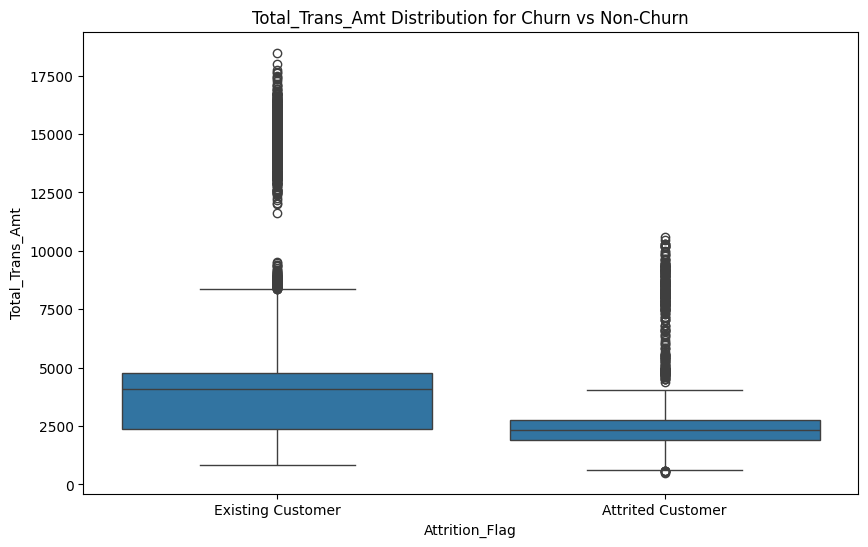

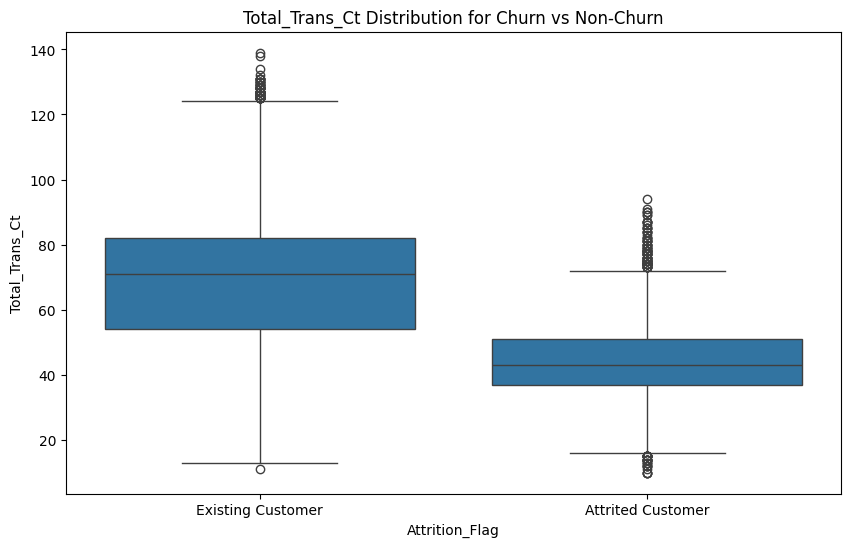

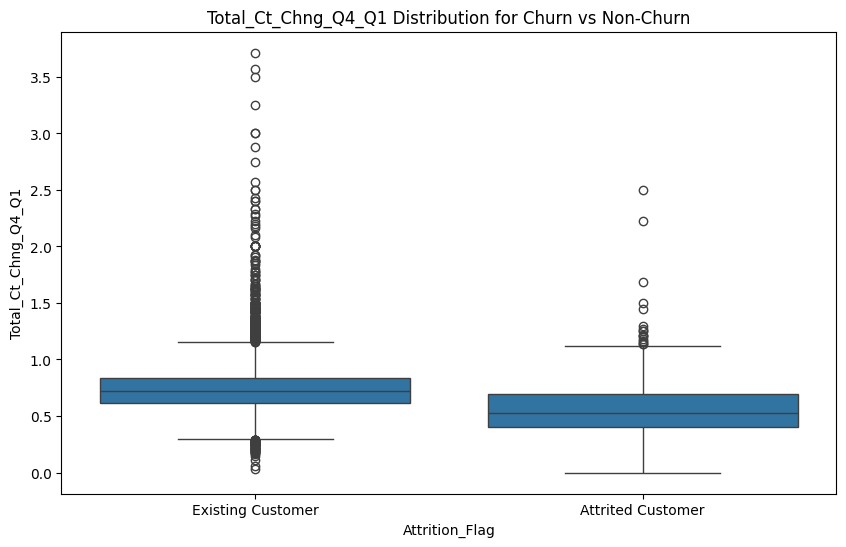

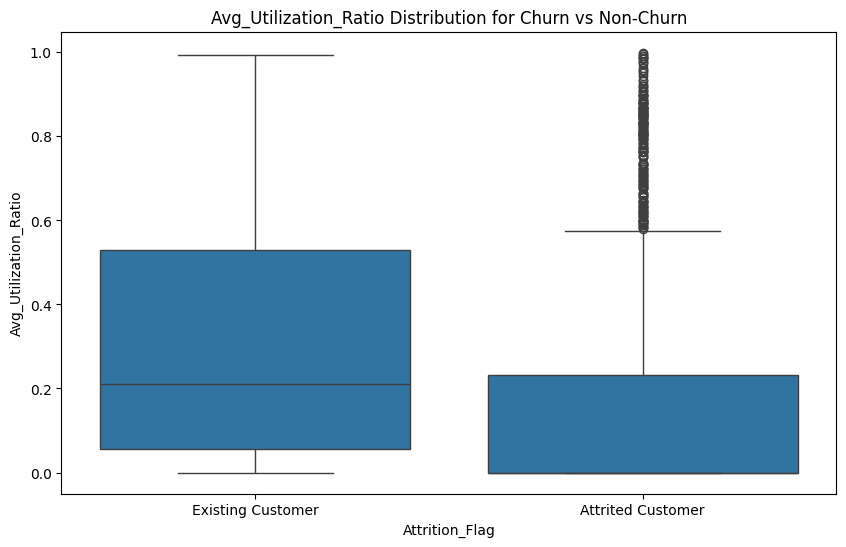

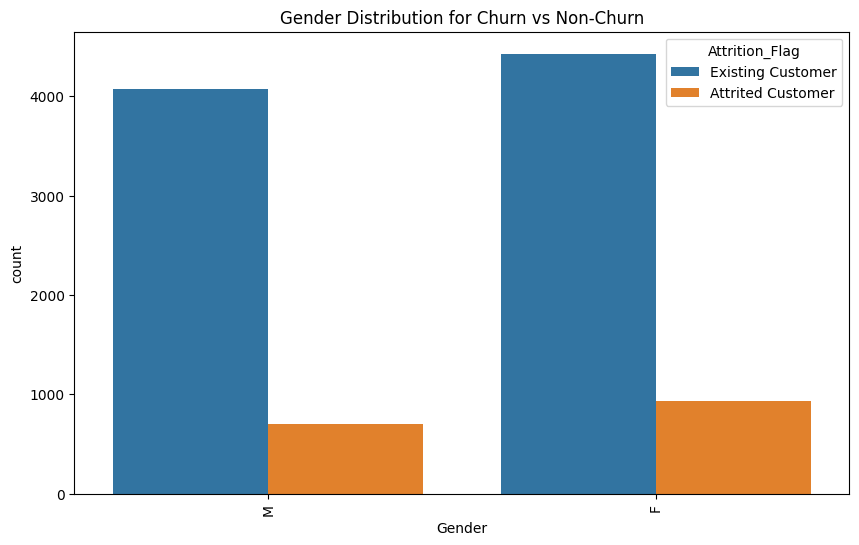

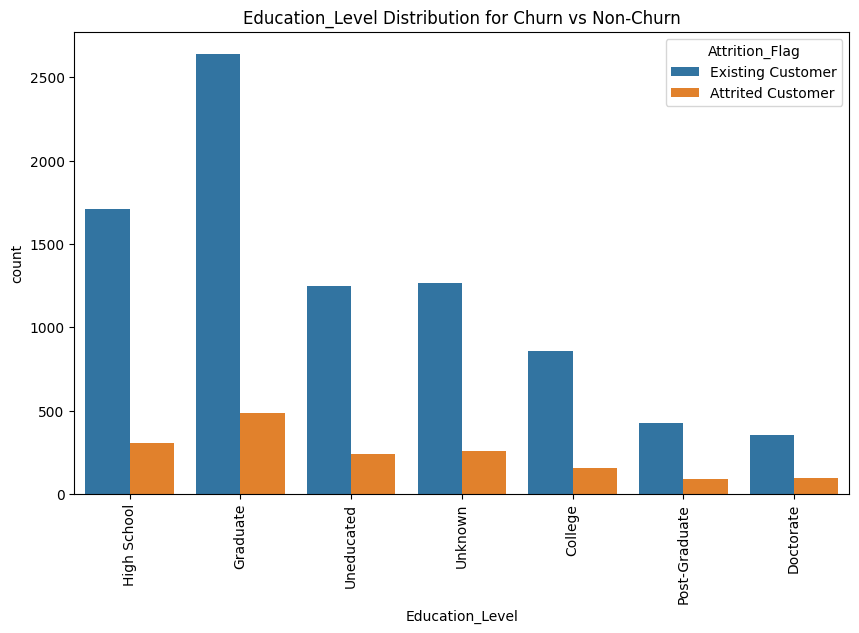

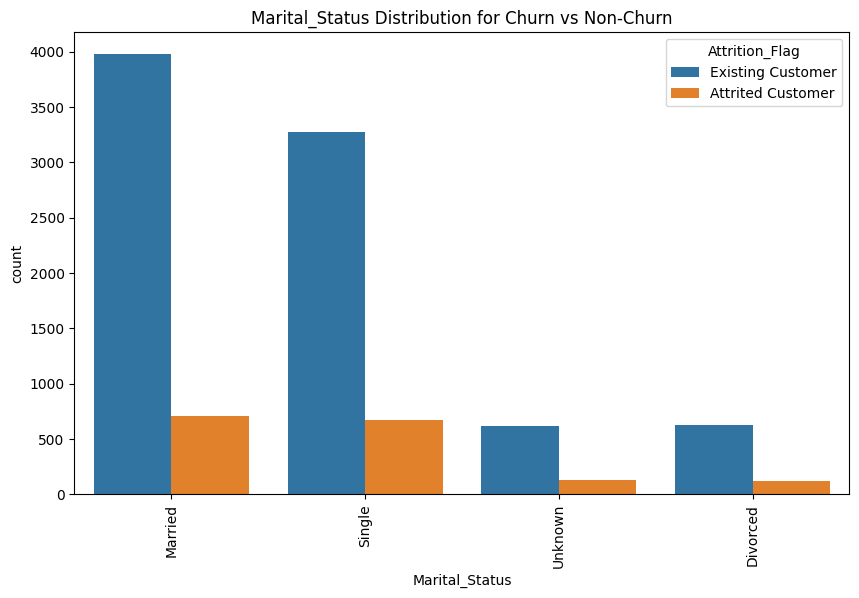

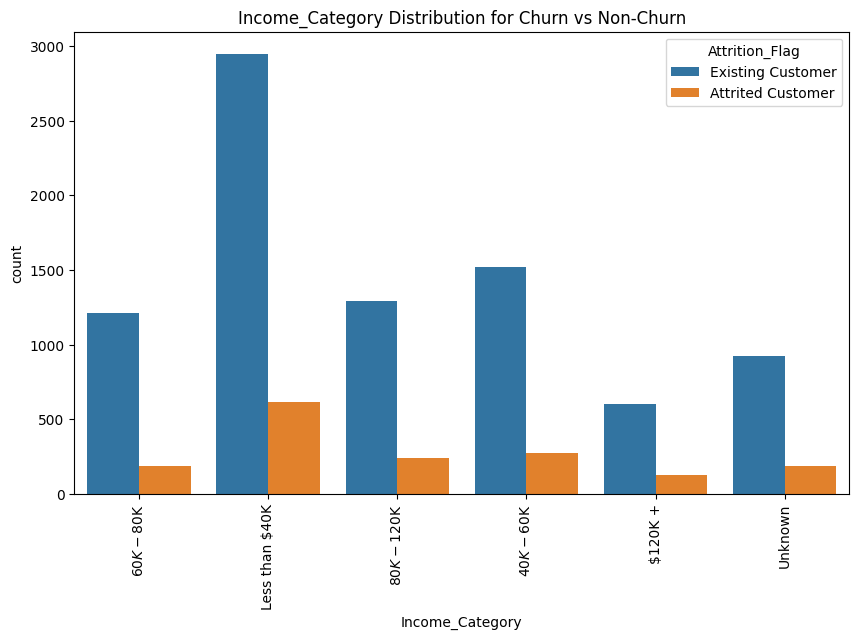

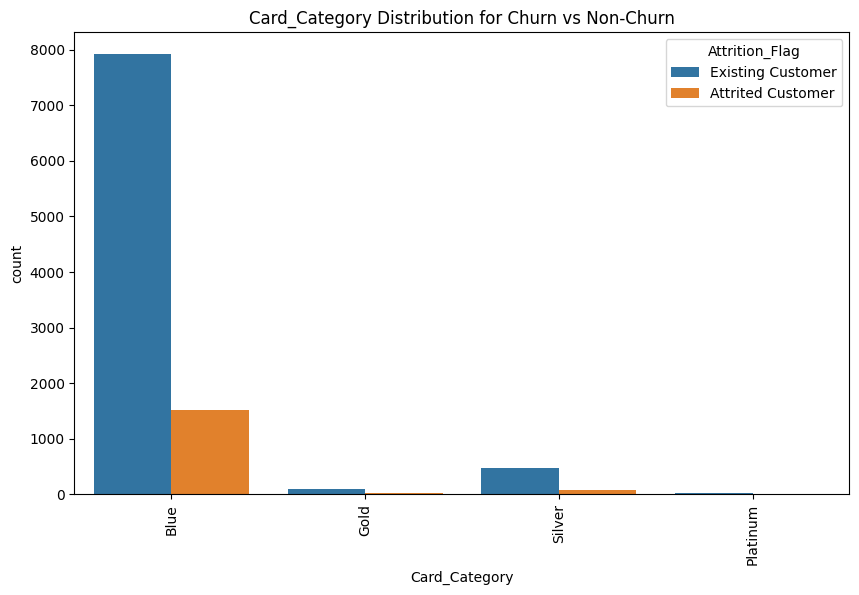

In [3]:
# List of categorical columns
cat_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# List of numerical columns
num_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
            'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 
            'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Boxplots for numerical features
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Attrition_Flag', y=col, data=data)
    plt.title(f'{col} Distribution for Churn vs Non-Churn')
    plt.show()

# Countplots for categorical features
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Attrition_Flag', data=data)
    plt.title(f'{col} Distribution for Churn vs Non-Churn')
    plt.xticks(rotation=90)
    plt.show()

In [4]:
from sklearn.impute import SimpleImputer

# Impute missing values for categorical and numerical columns
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_num = SimpleImputer(strategy='mean')

data[cat_cols] = imputer_cat.fit_transform(data[cat_cols])
data[num_cols] = imputer_num.fit_transform(data[num_cols])

In [5]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [6]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [7]:
# Drop unnecessary columns
data = data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [8]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop(['Attrition_Flag', 'CLIENTNUM'], axis=1)
y = data['Attrition_Flag']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

Attrited Customer       0.77      0.54      0.64       496
Existing Customer       0.92      0.97      0.94      2543

         accuracy                           0.90      3039
        macro avg       0.84      0.76      0.79      3039
     weighted avg       0.89      0.90      0.89      3039



In [11]:
from sklearn.ensemble import RandomForestClassifier

# Train random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_pred_rf))

                   precision    recall  f1-score   support

Attrited Customer       0.93      0.75      0.83       496
Existing Customer       0.95      0.99      0.97      2543

         accuracy                           0.95      3039
        macro avg       0.94      0.87      0.90      3039
     weighted avg       0.95      0.95      0.95      3039



In [12]:
from sklearn.model_selection import GridSearchCV

# Set up hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate best model
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

# Final evaluation
print(classification_report(y_test, y_pred_best))

Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
                   precision    recall  f1-score   support

Attrited Customer       0.92      0.73      0.82       496
Existing Customer       0.95      0.99      0.97      2543

         accuracy                           0.95      3039
        macro avg       0.94      0.86      0.89      3039
     weighted avg       0.95      0.95      0.94      3039



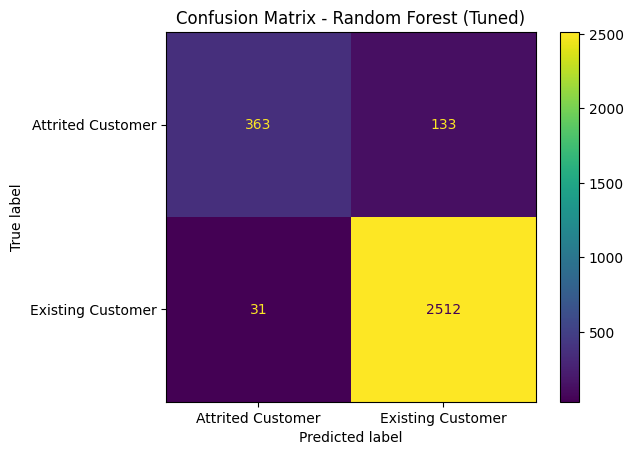

In [13]:
# Confusion matrix for the best model
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test)
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.show()